<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import BalancedData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 32
hidden_size = 128
dropout = 0.5
learning_rate = 5e-5
epochs = 30
max_len =300

In [4]:
vocab = set([str.lower() for str in words.words()])

# train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# Balanced dataset
train_dataset = BalancedData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = BalancedData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)

# embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
# embed = torch.tensor(embed)

Number of ham emails: 1500, spam emails: 1500
Number of ham emails: 1496, spam emails: 1496


In [5]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True,
                                  num_workers=8, pin_memory=True, drop_last=True)


In [6]:
model = models.spam_lstm(hidden_size=hidden_size, vocab_size=len(vocab), dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

  0%|          | 0/30 [00:00<?, ?it/s]/home/weinwang/anaconda3/envs/nlp/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
  3%|▎         | 1/30 [00:09<04:28,  9.25s/it]

Epoch 0
-------------------------------
Training loss: 0.693399, avg accuracy: 0.500111
Testing loss: 0.693250, avg accuracy: 0.500672


  7%|▋         | 2/30 [00:18<04:19,  9.25s/it]

Epoch 1
-------------------------------
Training loss: 0.693184, avg accuracy: 0.494792
Testing loss: 0.693177, avg accuracy: 0.499328


 10%|█         | 3/30 [00:27<04:10,  9.27s/it]

Epoch 2
-------------------------------
Training loss: 0.693138, avg accuracy: 0.501330
Testing loss: 0.693165, avg accuracy: 0.499664


 13%|█▎        | 4/30 [00:37<04:00,  9.26s/it]

Epoch 3
-------------------------------
Training loss: 0.693111, avg accuracy: 0.508311
Testing loss: 0.693171, avg accuracy: 0.497312


 17%|█▋        | 5/30 [00:46<03:50,  9.24s/it]

Epoch 4
-------------------------------
Training loss: 0.693095, avg accuracy: 0.498338
Testing loss: 0.693181, avg accuracy: 0.483199


 20%|██        | 6/30 [00:55<03:41,  9.24s/it]

Epoch 5
-------------------------------
Training loss: 0.692949, avg accuracy: 0.518506
Testing loss: 0.693200, avg accuracy: 0.486895


 23%|██▎       | 7/30 [01:04<03:32,  9.25s/it]

Epoch 6
-------------------------------
Training loss: 0.692736, avg accuracy: 0.524601
Testing loss: 0.693235, avg accuracy: 0.480511


 27%|██▋       | 8/30 [01:13<03:23,  9.25s/it]

Epoch 7
-------------------------------
Training loss: 0.692418, avg accuracy: 0.525709
Testing loss: 0.693524, avg accuracy: 0.485887


 30%|███       | 9/30 [01:23<03:13,  9.23s/it]

Epoch 8
-------------------------------
Training loss: 0.689761, avg accuracy: 0.537899
Testing loss: 0.699297, avg accuracy: 0.477487


 33%|███▎      | 10/30 [01:32<03:04,  9.25s/it]

Epoch 9
-------------------------------
Training loss: 0.673896, avg accuracy: 0.535904
Testing loss: 0.709723, avg accuracy: 0.486223


 37%|███▋      | 11/30 [01:41<02:55,  9.25s/it]

Epoch 10
-------------------------------
Training loss: 0.658411, avg accuracy: 0.556073
Testing loss: 0.698996, avg accuracy: 0.494288


 40%|████      | 12/30 [01:50<02:46,  9.25s/it]

Epoch 11
-------------------------------
Training loss: 0.650945, avg accuracy: 0.627327
Testing loss: 0.694282, avg accuracy: 0.559140


 43%|████▎     | 13/30 [02:00<02:37,  9.24s/it]

Epoch 12
-------------------------------
Training loss: 0.624519, avg accuracy: 0.639849
Testing loss: 0.716977, avg accuracy: 0.567204


 47%|████▋     | 14/30 [02:09<02:27,  9.25s/it]

Epoch 13
-------------------------------
Training loss: 0.638755, avg accuracy: 0.612367
Testing loss: 0.688431, avg accuracy: 0.533938


 50%|█████     | 15/30 [02:18<02:18,  9.26s/it]

Epoch 14
-------------------------------
Training loss: 0.628544, avg accuracy: 0.617575
Testing loss: 0.704554, avg accuracy: 0.566868


 53%|█████▎    | 16/30 [02:28<02:09,  9.25s/it]

Epoch 15
-------------------------------
Training loss: 0.631999, avg accuracy: 0.616800
Testing loss: 0.692711, avg accuracy: 0.519489


 57%|█████▋    | 17/30 [02:37<02:00,  9.25s/it]

Epoch 16
-------------------------------
Training loss: 0.637895, avg accuracy: 0.607159
Testing loss: 0.776699, avg accuracy: 0.565860


 60%|██████    | 18/30 [02:46<01:51,  9.26s/it]

Epoch 17
-------------------------------
Training loss: 0.622265, avg accuracy: 0.632425
Testing loss: 0.677265, avg accuracy: 0.553763


 63%|██████▎   | 19/30 [02:55<01:41,  9.26s/it]

Epoch 18
-------------------------------
Training loss: 0.627471, avg accuracy: 0.607048
Testing loss: 0.682784, avg accuracy: 0.559476


 67%|██████▋   | 20/30 [03:05<01:32,  9.27s/it]

Epoch 19
-------------------------------
Training loss: 0.615316, avg accuracy: 0.624446
Testing loss: 0.719411, avg accuracy: 0.572245


 70%|███████   | 21/30 [03:14<01:23,  9.25s/it]

Epoch 20
-------------------------------
Training loss: 0.611875, avg accuracy: 0.629211
Testing loss: 0.687177, avg accuracy: 0.548051


 73%|███████▎  | 22/30 [03:23<01:14,  9.27s/it]

Epoch 21
-------------------------------
Training loss: 0.617291, avg accuracy: 0.613143
Testing loss: 0.691576, avg accuracy: 0.560484


 77%|███████▋  | 23/30 [03:32<01:04,  9.27s/it]

Epoch 22
-------------------------------
Training loss: 0.609507, avg accuracy: 0.622562
Testing loss: 0.699715, avg accuracy: 0.579301


 80%|████████  | 24/30 [03:42<00:55,  9.26s/it]

Epoch 23
-------------------------------
Training loss: 0.598350, avg accuracy: 0.631981
Testing loss: 0.703047, avg accuracy: 0.589718


 83%|████████▎ | 25/30 [03:51<00:46,  9.25s/it]

Epoch 24
-------------------------------
Training loss: 0.583592, avg accuracy: 0.677859
Testing loss: 0.707519, avg accuracy: 0.605511


 87%|████████▋ | 26/30 [04:00<00:37,  9.26s/it]

Epoch 25
-------------------------------
Training loss: 0.573039, avg accuracy: 0.717309
Testing loss: 0.766713, avg accuracy: 0.601478


 90%|█████████ | 27/30 [04:09<00:27,  9.26s/it]

Epoch 26
-------------------------------
Training loss: 0.559762, avg accuracy: 0.739805
Testing loss: 0.744407, avg accuracy: 0.619624


 93%|█████████▎| 28/30 [04:19<00:18,  9.27s/it]

Epoch 27
-------------------------------
Training loss: 0.555667, avg accuracy: 0.729388
Testing loss: 0.652312, avg accuracy: 0.643817


 97%|█████████▋| 29/30 [04:28<00:09,  9.25s/it]

Epoch 28
-------------------------------
Training loss: 0.571141, avg accuracy: 0.689384
Testing loss: 0.657022, avg accuracy: 0.648858


100%|██████████| 30/30 [04:37<00:00,  9.26s/it]

Epoch 29
-------------------------------
Training loss: 0.560417, avg accuracy: 0.698360
Testing loss: 0.684078, avg accuracy: 0.655914


Final testing loss: 0.685632, testing accuracy: 0.653898
Ham Precision: 0.621092, Recall: 0.788164, F1 score: 0.694724.
Ham Precision: 0.710744, Recall: 0.519812, F1 score: 0.600465.


(0.5604169130959409, 0.6856315975548118)

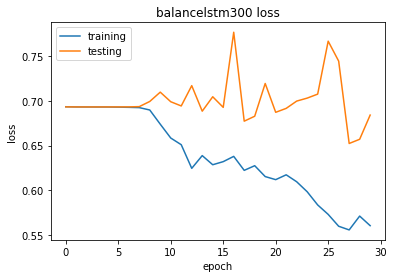

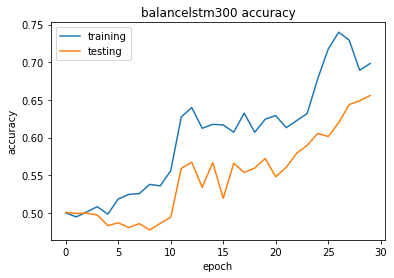

In [7]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="balancelstm300", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
# torch.save(model.state_dict(), output_dir+"lstmlen200_hid64.pt")